### Support Vector Machines

SVM through a dataset called "Chronic Kidney Disease"

### Chronic Kidney Disease

Chronic Kidney Disease(CKD) means your kidneys are damaged and can't filter blood the way they should. The main risk factors for developing kidney disease are diabetes, 
high blood pressure , heart disease and a family history of kidney failure.

### About the Data

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. There are 400 rows.

The dataset is available at : https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

### Problem Statement

The aim of this dataset is to classify patients who are suffering from Chronic Kidney Disease and who aren't suffering from Chronic Kidney Disease with the help of parameters such as age, blood pressure, sugar etc.

### Importing Libraries

In [1]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Algorithm 

from sklearn.svm import SVC, LinearSVC

### Getting the data

In [2]:
kidney_data = pd.read_csv('C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/kidney_disease.csv')

In [3]:
pd.set_option('display.max_columns',30)
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### Understanding the Attributes

1. age - age of patient
2. bp - blood pressure level of patient
3. sg - Specific gravity is the ratio of the density of the substance to the density of a reference substance.
4. al - Albumin ( It is a type of protein the liver makes. It's one of the most abundant proteins in the blood. We need a proper balance of albumin to keep fluid from leaking out of blood vessels.)
5. su - Sugar level in the blood
6. rbc - It refers to Red blood cells in the blood.
7. pc - Pus is the result of the body's natural immune system automatically responding to an infection, usually caused by bacteria or fungi.
8. pcc - Pyuria is a condition that occurs when excess white blood cells, or pus, are present in the urine.Parasites, kidney stones, tumors and cysts, and interstitial cystitis can also lead to pyuria.
9. ba - Bacteria
10. bgr - The reference values for a "normal" random glucose test in an average adult are 79–140mg/dl (4.4–7.8 mmol/l), between 140-200mg/dl (7.8–11.1 mmol/l) is considered pre-diabetes, and ≥ 200 mg/dl is considered diabetes according to ADA guidelines 
11. bu - Nitrogen in the blood that comes from urea (a substance formed by the breakdown of protein in the liver). The kidneys filter urea out of the blood and into the urine. A high level of urea nitrogen in the blood may be a sign of a kidney problem.
12. sc - Serum Creatinine ( Creatinine is a breakdown product of creatinine phosphate in muscle, and is usually produced ata)
13. sod - Sodium (sod in mEq/L)
14. pot - Potassium (pot in mEq/L)
15. hemo - Hemoglobin (hemo in gms)
16. pcv - Packed Cell Volume
17. wc - White Blood Cell Count (wc in cells/cumm)
18. rc - Red Blood Cell Count(rc in millions/cumm)
19. htn - Hypertension (It is also known as high blood pressure(HBP) is a long-term medical condition in which the blood pressure in the arteries is persistently elevated.)
20. dm - Diabetes Mellitus(A disease in which the body’s ability to produce or respond to the hormone insulin is impaired, resulting in abnormal metabolism of carbohydrates and elevated levels of glucose in the blood.)
21. cad - Coronary Artery Disease (It happens when the arteries that supply blood to heart muscle become hardened and narrowed.)
22. appet - Appetite (A natural desire to satisfy a bodily need, especially for food)
23. pe - Pedal Edema( It is the accumulation of fluid in the feet and lower legs. )
24. ane - Anemia (A condition in which there is a deficiency of red cells or of haemoglobin in the blood, resulting in pallor and weariness.)
25. classification- It classifies whether a person is suffering from chronic kidney disease or not.

### Data Types of the data

In [4]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

### Categorical and Numerical Variables

1. Categorical variable : rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, appet, pe, ane and classification
2. Numerical variable : age, bp , sg, al, su, bgr, bu, sc, sod, pot and hemo.

### Data Description

In [5]:
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Missing variables

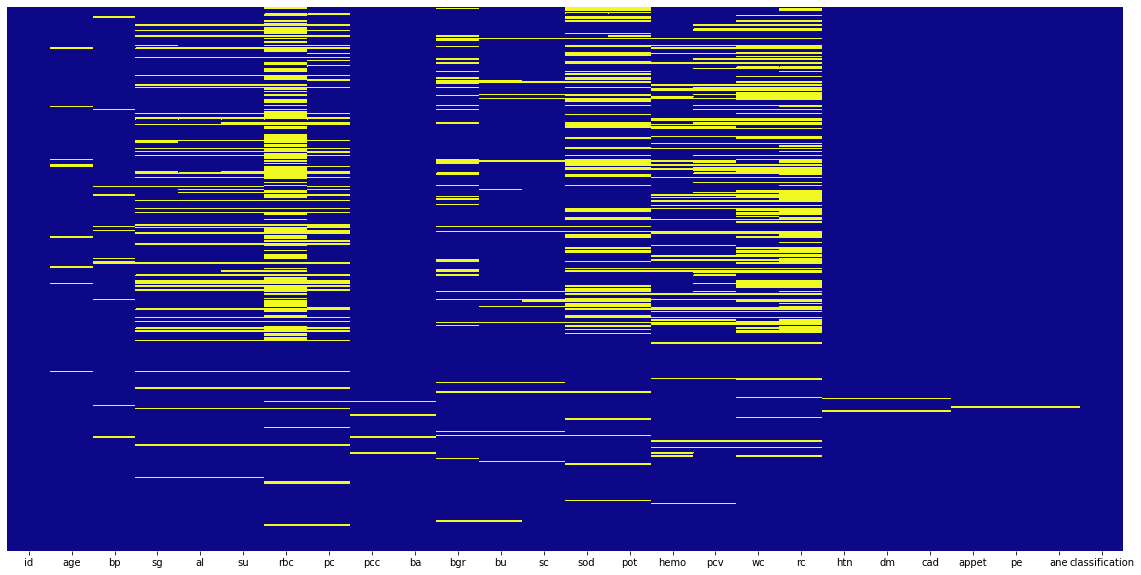

In [6]:
# Visualization of Missing variables
plt.figure(figsize=(20,10))
sns.heatmap(kidney_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

We see null values in the columns age, bp, sg, al, su, rbc, pc, pcc,ba,bgr,bu, sc,sod, pot, hemo, pcv, wc, rc, htn, dm ,cad, appet, pe and ane. 
Let us also find the count of missing values.

In [7]:
# Count of null values
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Extracting null cols
null_cols = kidney_data.columns[kidney_data.isnull().any()]

Let us have a look into the categorical attributes which have missing values in them

In [9]:
for cols in kidney_data.select_dtypes("object"):
    kidney_data[cols] = kidney_data[cols].astype("category")

In [10]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null category
pc                335 non-null category
pcc               396 non-null category
ba                396 non-null category
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null category
wc                295 non-null category
rc                270 non-null category
htn               398 non-null category
dm                398 non-null category
cad               398 non-null category
appet             399 non-nul

In [11]:
cat_cols = []
for cols in kidney_data.select_dtypes("category"):
    cat_cols.append(cols)

In [12]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [13]:
value_count_lst = []
for col in kidney_data.select_dtypes("category"):
    value_count_lst.append(kidney_data[col].value_counts())

In [14]:
value_count_lst

[normal      201
 abnormal     47
 Name: rbc, dtype: int64, normal      259
 abnormal     76
 Name: pc, dtype: int64, notpresent    354
 present        42
 Name: pcc, dtype: int64, notpresent    374
 present        22
 Name: ba, dtype: int64, 52      21
 41      21
 44      19
 48      19
 40      16
 43      14
 42      13
 45      13
 33      12
 28      12
 32      12
 36      12
 50      12
 37      11
 34      11
 46       9
 29       9
 35       9
 30       9
 31       8
 39       7
 24       7
 26       6
 38       5
 54       4
 51       4
 47       4
 49       4
 53       4
 27       3
 25       3
 22       3
 23       2
 19       2
 14       1
 16       1
 \t?      1
 15       1
 9        1
 17       1
 18       1
 20       1
 21       1
 \t43     1
 Name: pcv, dtype: int64, 9800      11
 6700      10
 9200       9
 7200       9
 9600       9
           ..
 15700      1
 14900      1
 13600      1
 12700      1
 \t6200     1
 Name: wc, Length: 92, dtype: int64, 5.2    18
 4.5

In [15]:
de_cols = ['classification','pcv','wc','rc','dm','cad']

In [16]:
for cols in kidney_data[de_cols]:
    kidney_data[cols] = kidney_data[cols].str.replace('\t',"")
    kidney_data[cols] = kidney_data[cols].replace("?",np.nan)
    kidney_data[cols] = kidney_data[cols].str.strip()

In [17]:
# Let us cross-check it with target feature "classification"
kidney_data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

We see that the labels for features are error-free.

We see after imputation the columns got converted to "object" data type. Let us convert the columns "pcv","wc" and "rc" to numeric data type and columns "dm","cad" and "classification" to data type "category".

Also, we observe that for some features "pcv", "wc" and "rc" there are many numerical values. It is better if we convert them to float data type.

In [18]:
cat_num_cols = ["pcv","wc","rc"]
for col in kidney_data[cat_num_cols]:
    kidney_data[col] = kidney_data[col].astype("float")

In [19]:
cat_obj_cols = ["dm","cad","classification"]
for col in kidney_data[cat_obj_cols]:
    kidney_data[col] = kidney_data[col].astype("category")

In [20]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null category
pc                335 non-null category
pcc               396 non-null category
ba                396 non-null category
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               329 non-null float64
wc                294 non-null float64
rc                269 non-null float64
htn               398 non-null category
dm                398 non-null category
cad               398 non-null category
appet             399 non-null c

In [21]:
# Copying the dataframe "kidney_data" to dataframe "knn_df"
knn_df = kidney_data.copy()

In [22]:
# Categorical Columns
cat_cols = []
for col in knn_df.select_dtypes("category"):
    cat_cols.append(col)

In [23]:
kd_cat_df = pd.DataFrame(knn_df[cat_cols])

In [24]:
kd_cat_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [25]:
# Numerical Columns
num_cols = []
for col in knn_df.select_dtypes(['int64','float64']):
    num_cols.append(col)

In [26]:
kd_num_df = pd.DataFrame(knn_df[num_cols])

For imputing numerical columns we will be using Random Imputation

In [27]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [28]:
for feature in num_cols:
    kd_num_df = pd.DataFrame(random_imputation(kd_num_df, feature))

In [29]:
# Imputing the categorical cols using mode
kd_cat_df[cat_cols] = kd_cat_df[cat_cols].fillna(kd_cat_df.mode().iloc[0])

kd_cat_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [30]:
# After imputation, copying the numerical and categorical columns to dataframe "kidney_data"

kidney_data[num_cols] = kd_num_df
kidney_data[cat_cols] = kd_cat_df

In [31]:
kidney_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

#### Oultier Analysis

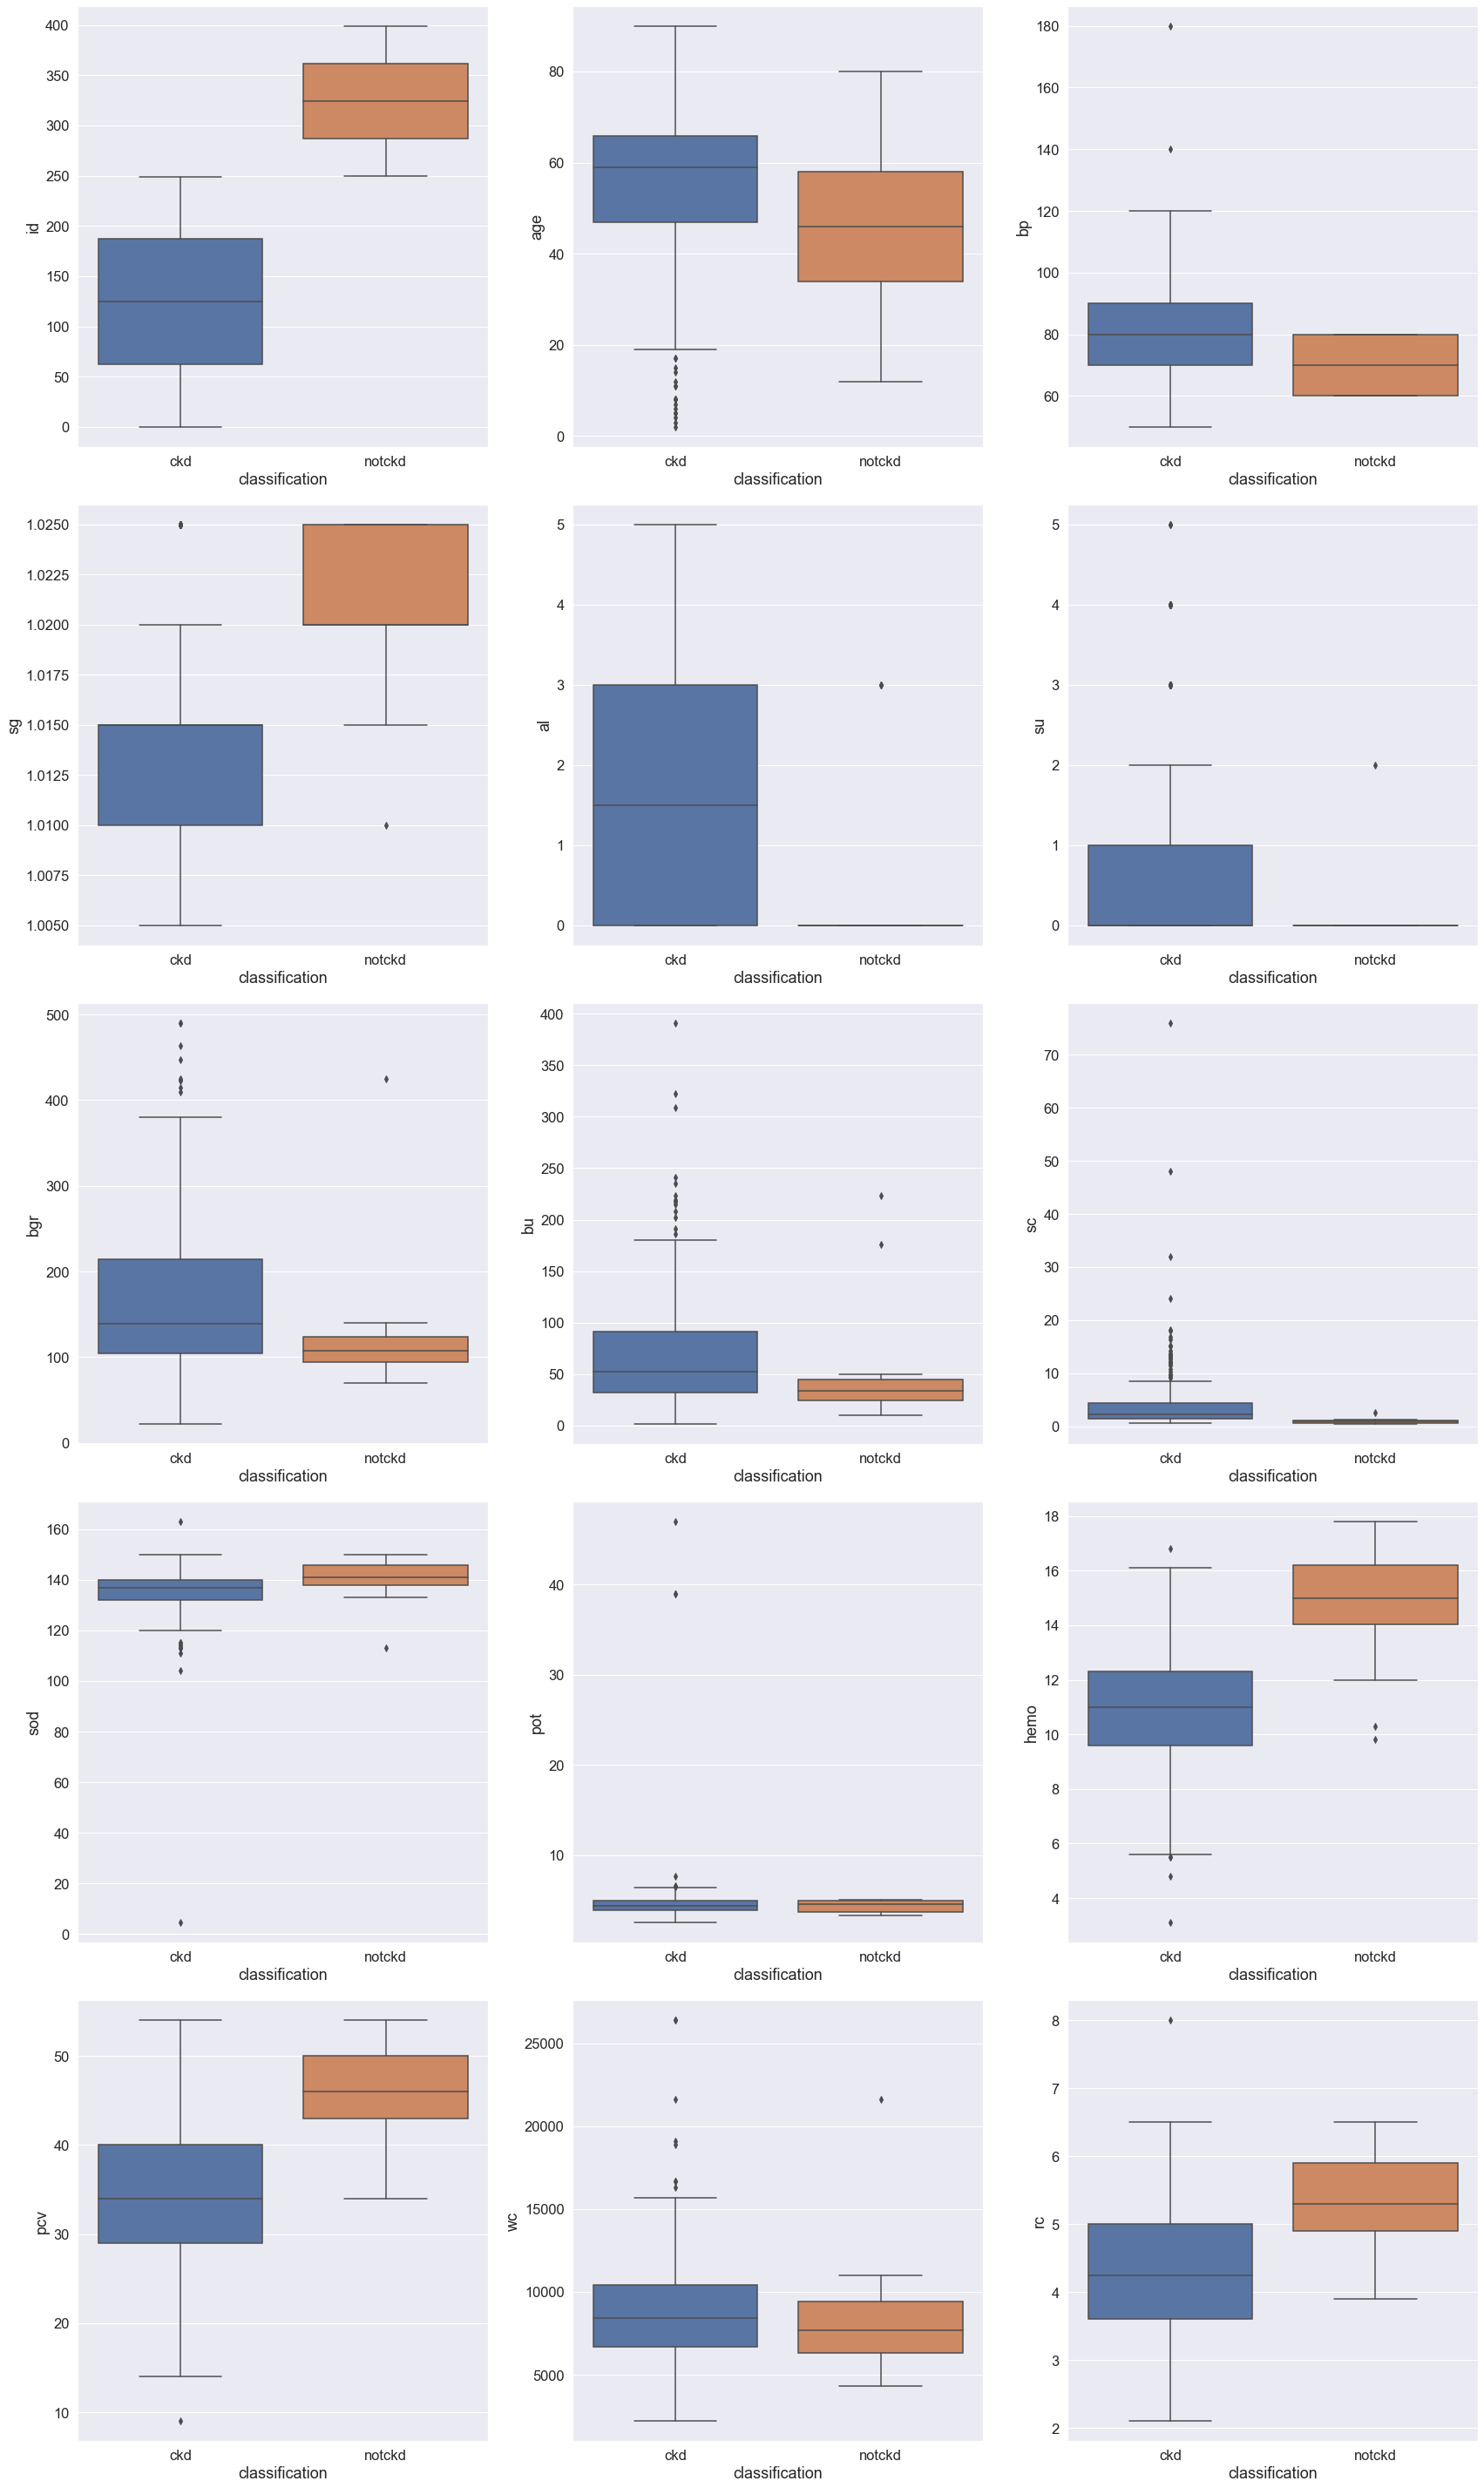

In [32]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,40))
i=1
for column in kidney_data[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(x=kidney_data.classification, y=kidney_data.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

#### Inferences:-

1. We observe some patients having high sugar levels above normal range.
2. Patients having bgr > 200 are suffering from diabetes according to ADA guidelines. 
3. Patients have higher nitrogren levels contained in urea in body. 
4. If the Serum Certainine level is very high the person suffers from chronic kidney disease and has very less chance to survive.
5. The normal level to have sodium in body is 135-145 mEq/L,but for kidney failure, patients usually have low sodium. Level almost 0 is again an outlier. 
6. Potassium levels in the body which are greater than 7, patients have chances of severe hyperkalemia. However, levels greater than 30 is really an outlier. 
7. Hemoglobin in a person less than 5 is clearly is outlier and person has very less chance to survive.

#### Univariate Analysis

In [33]:
kidney_data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

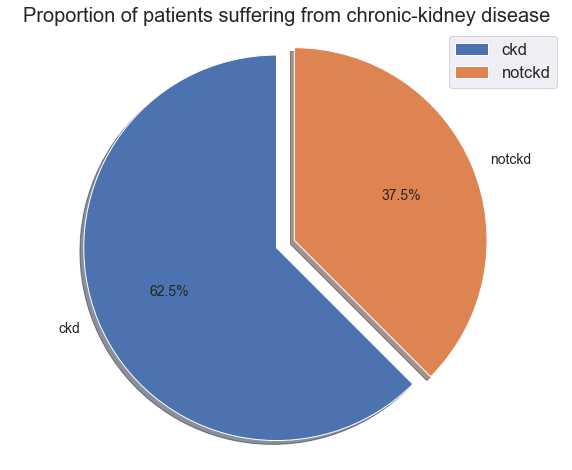

In [34]:
labels = 'ckd','notckd'
sizes = [kidney_data.classification[kidney_data['classification']=='ckd'].count(), kidney_data.classification[kidney_data['classification']=='notckd']
         .count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of patients suffering from chronic-kidney disease",size=20)
plt.show()

#### 62% patients are suffering from chronic kidney disease.

#### Categorical Features

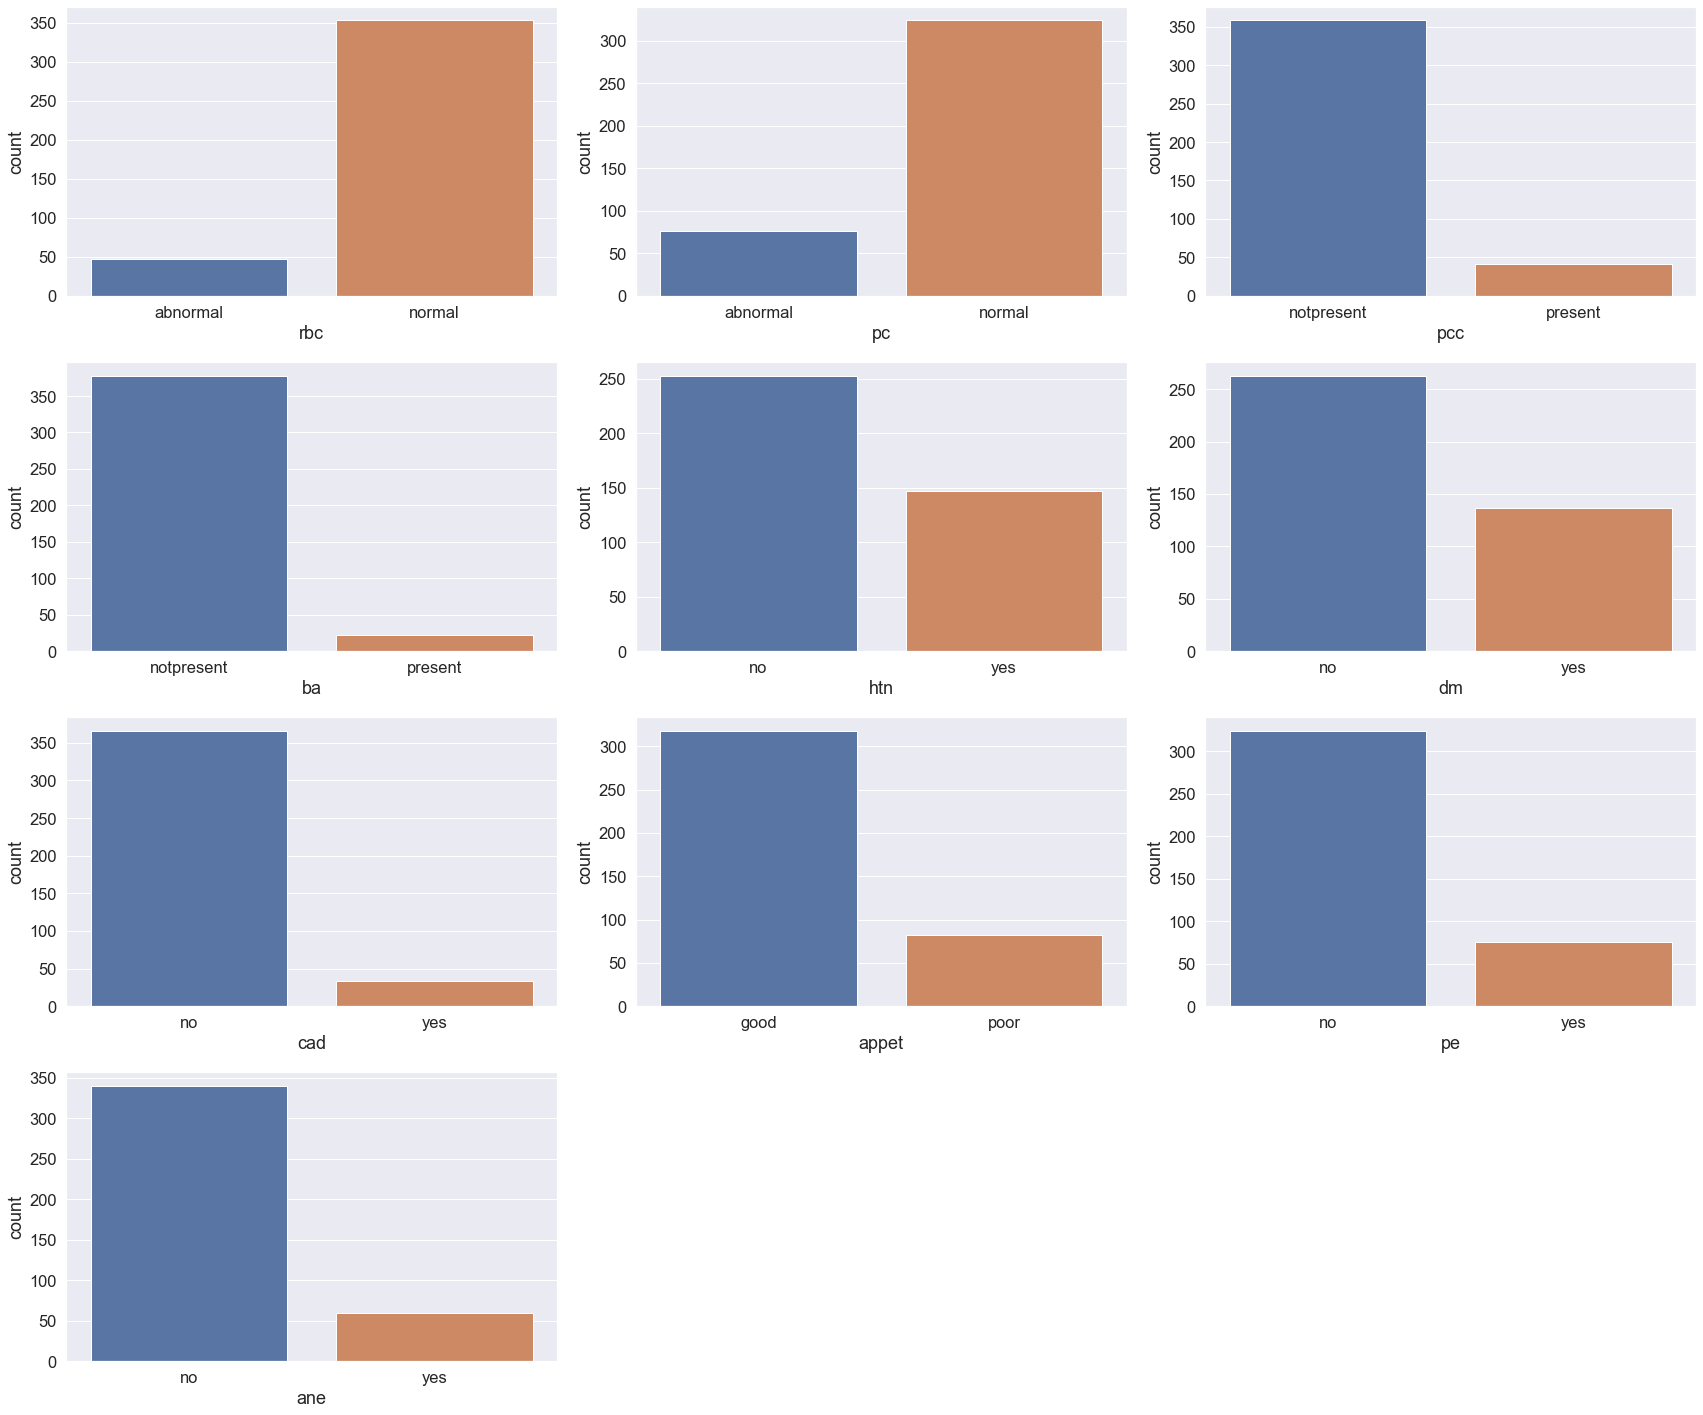

In [35]:
sns.set(rc={'figure.figsize':(24,20)}, font_scale=1.5)

i = 1
for column in kidney_data.select_dtypes("category"):
    if column != "classification":
        plt.subplot(4,3,i)
        sns.countplot(kidney_data[column])
        i = i + 1
                   
plt.tight_layout()
plt.show()

The univariate analysis of various categorical variables shows the distribution of labels in the respective columns. However, for some columns such as "wc" the label size is very huge. Hence, you can observe lot of values overlapping over each other.

#### Numerical Variables

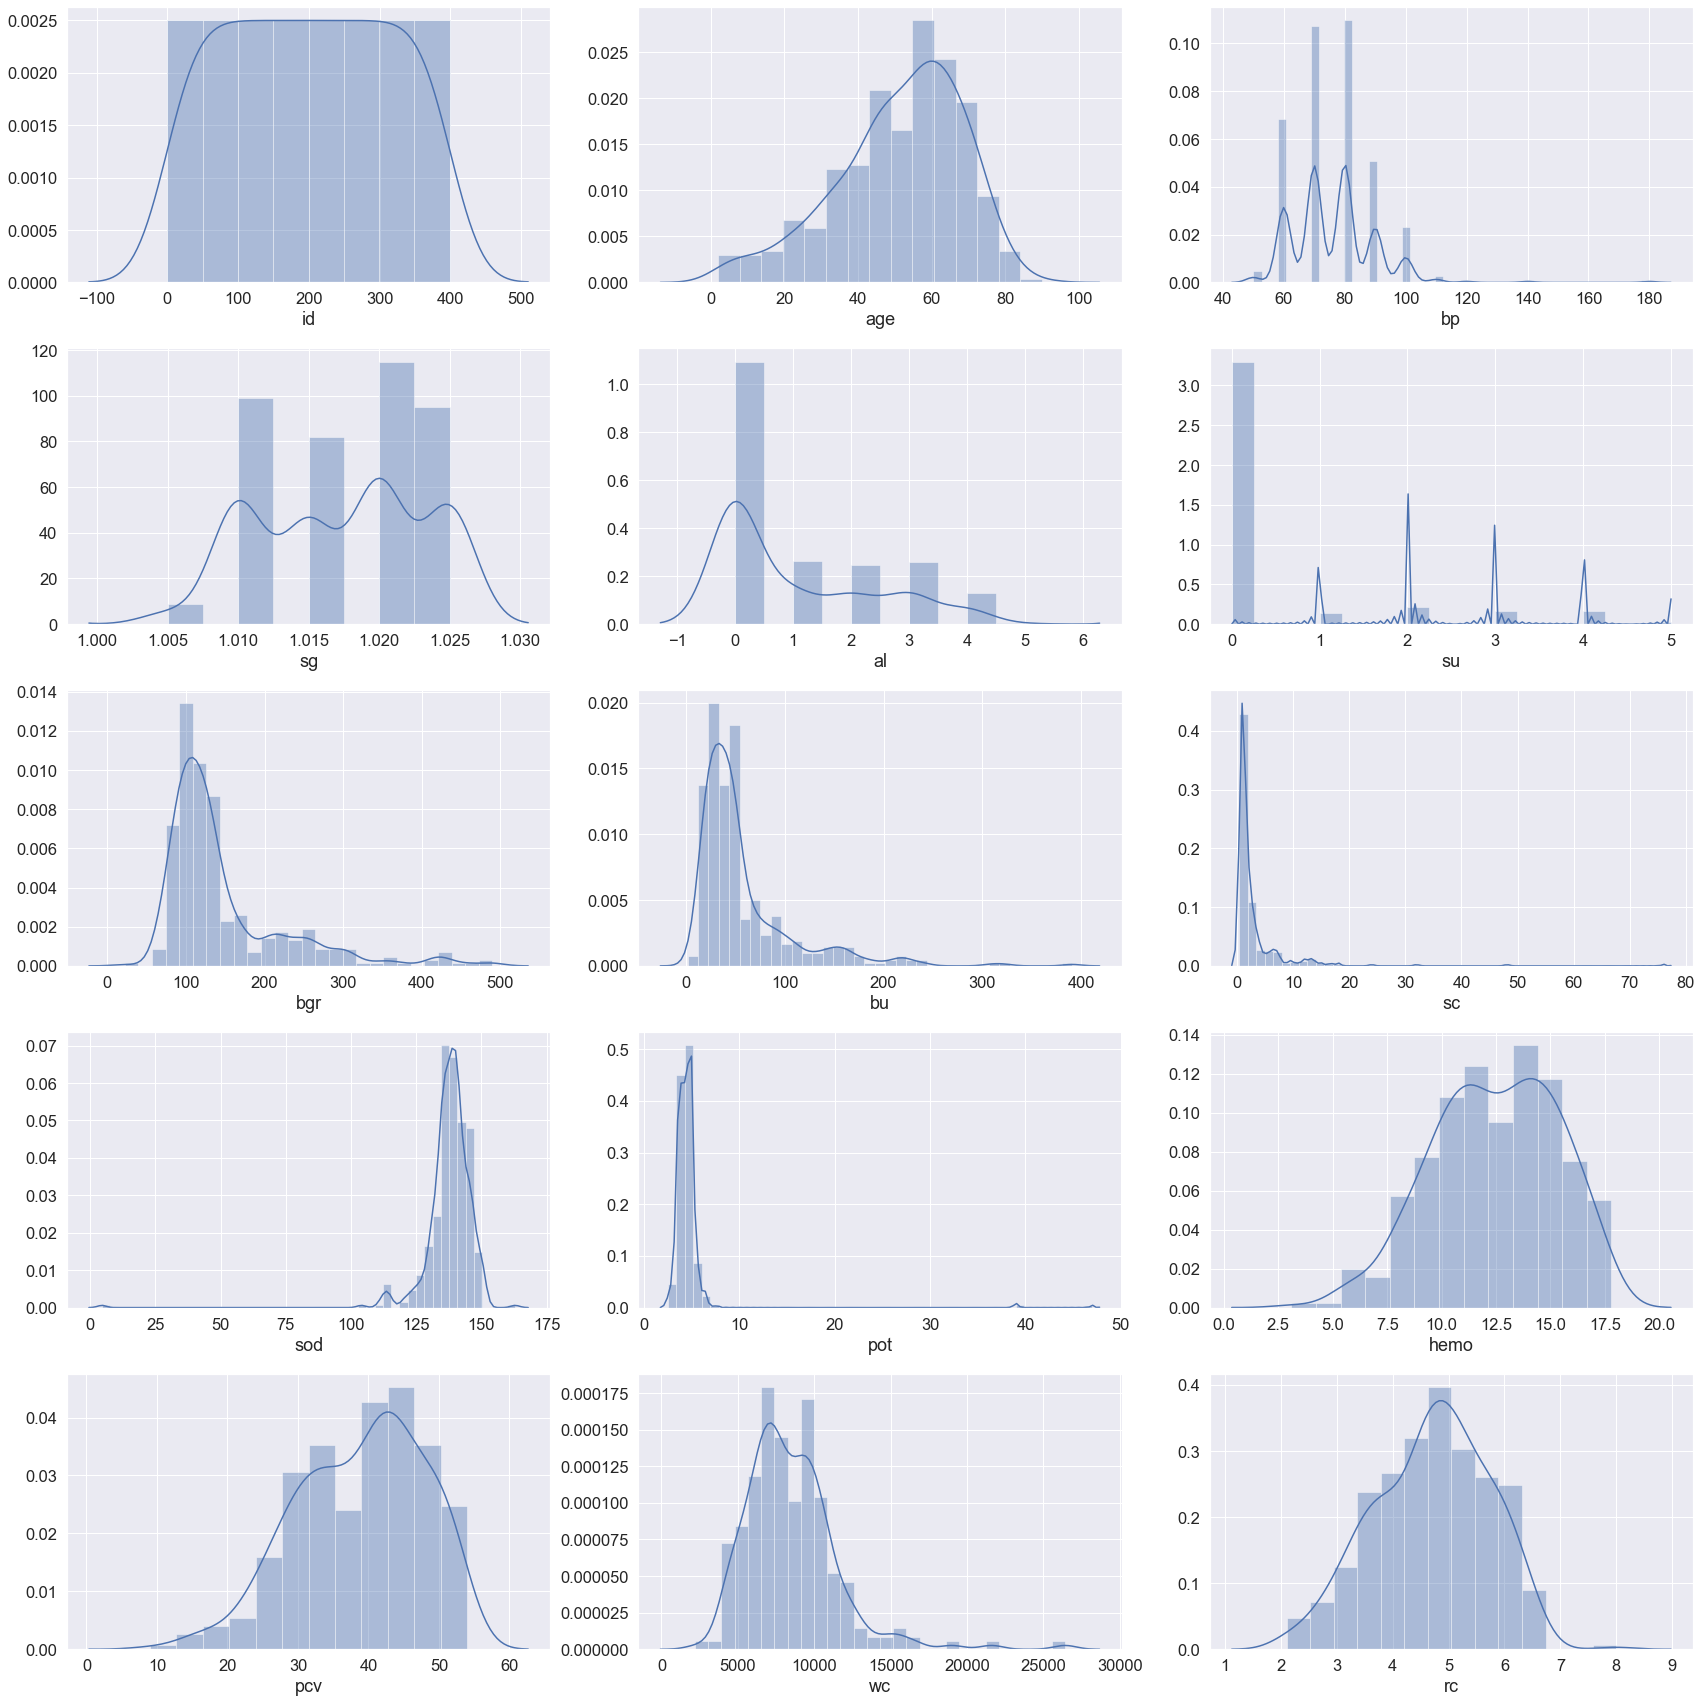

In [36]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
i = 1
for column in kidney_data.select_dtypes(["int64","float64"]):
    plt.subplot(5,3,i)
    sns.distplot(kidney_data[column])
    i = i + 1
          
plt.tight_layout()
plt.show()

We don't observe a perfectly normal distribution among the features except "id", which is no much required in our further analysis. Most of the features are either right or left skewed. Features such as "age" and "hemo" almost nearing to a normal distribution.

In [37]:
kidney_data = kidney_data.drop(["id"], axis=1)

kidney_data.shape

(400, 25)

#### Bi-variate analysis

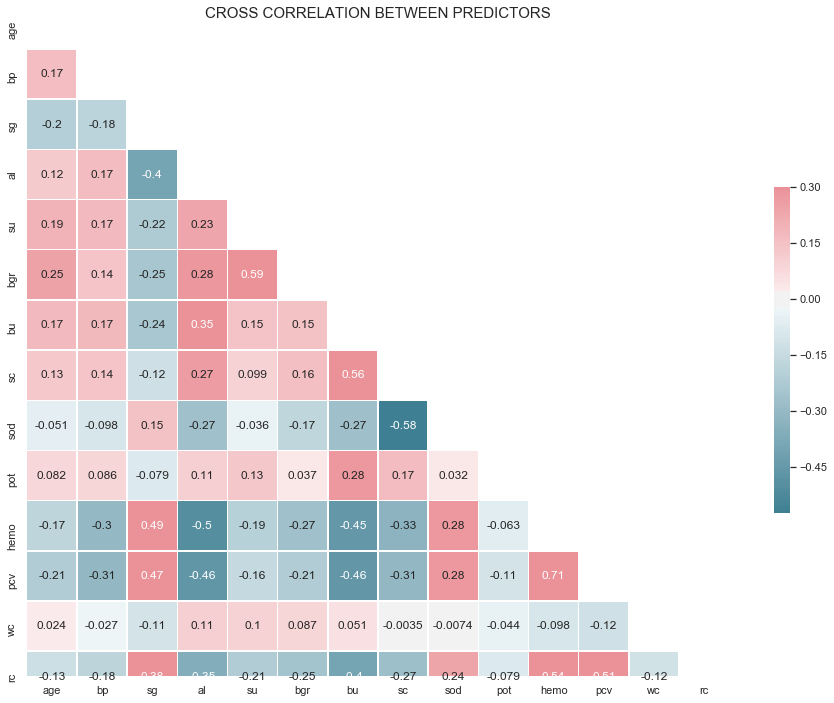

In [38]:
sns.set(style="white")

# Compute the correlation matrix
corr = kidney_data.iloc[:, :-1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.show()

The features which are highly correlated are "hemoglobin","sugar","serum creatinine","nitrogen in blood" and "blood glucose test".

#### Contiunuous features comparison w.r.t Target

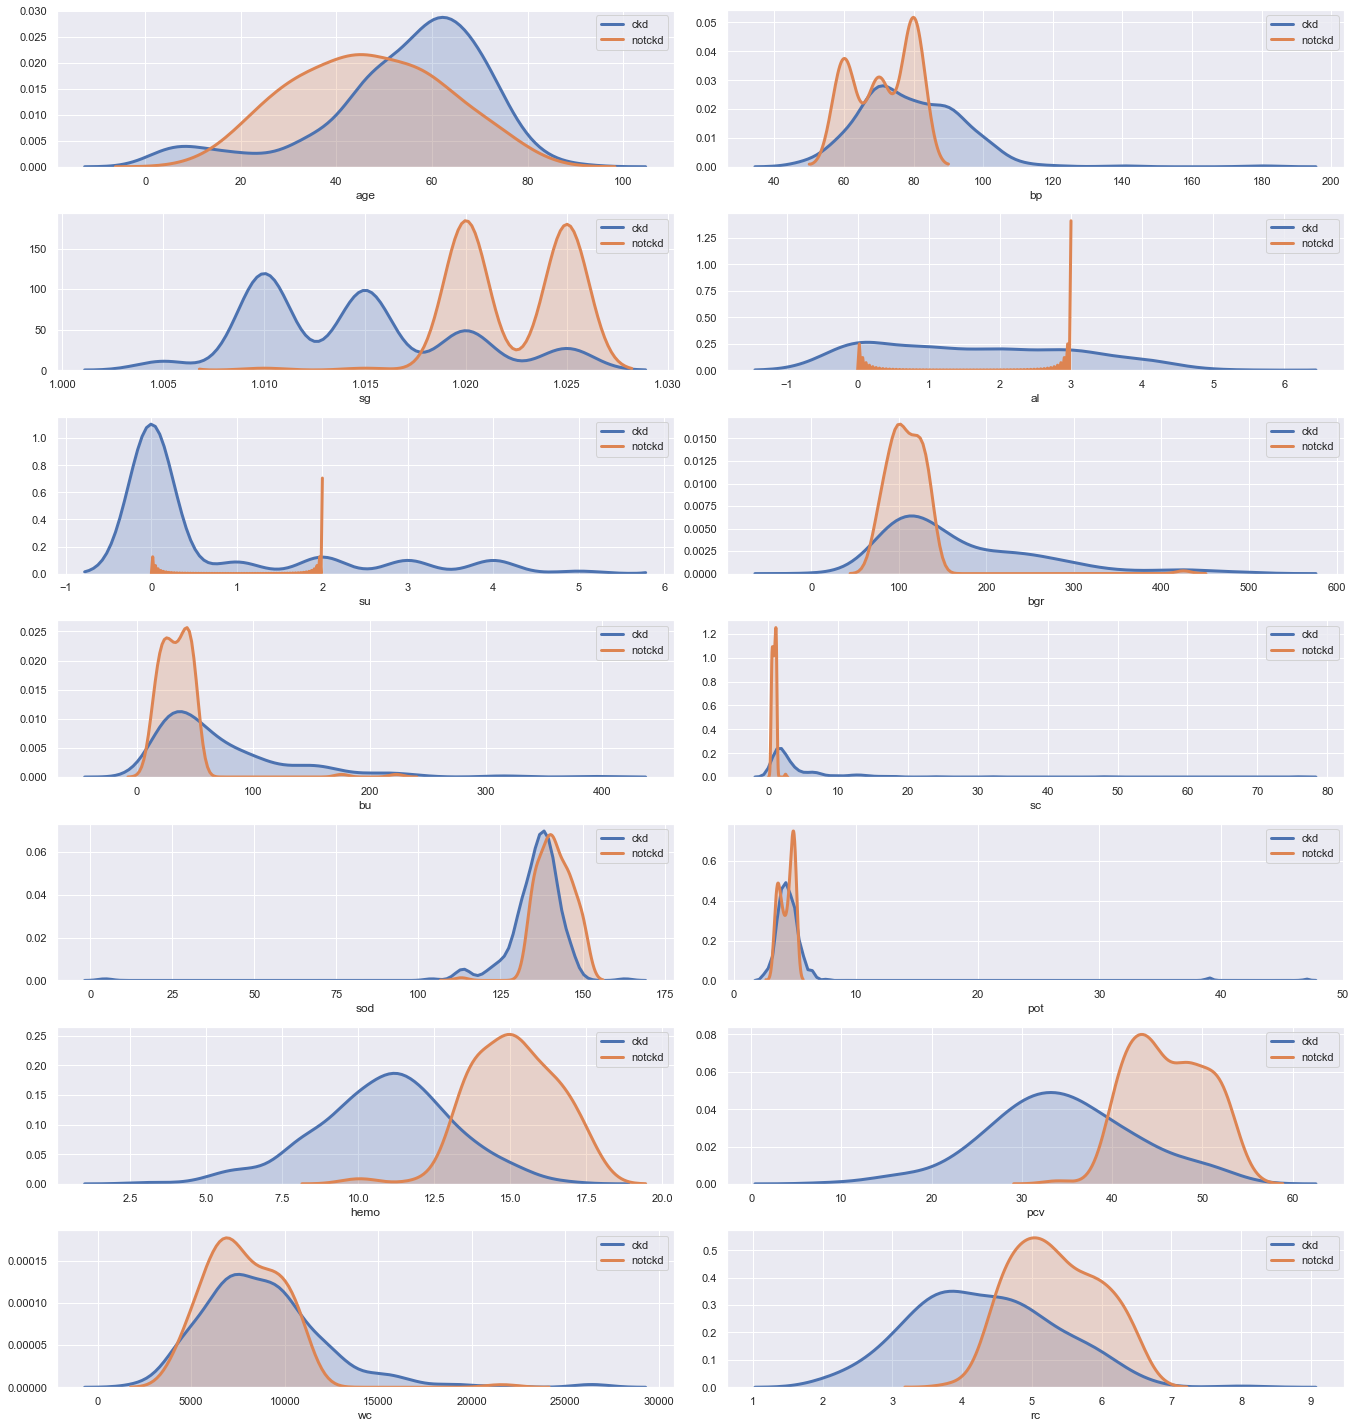

In [40]:
sns.set()
fig = plt.figure(figsize=(19,20))
i=1
for column in kidney_data.select_dtypes(["int64","float64"]):
    plt.subplot(7,2,i)
    sns.distplot(kidney_data.loc[kidney_data.classification=='ckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3}, label='ckd')
    sns.distplot(kidney_data.loc[kidney_data.classification=='notckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},label='notckd')
    i=i+1
plt.tight_layout()
plt.show()

#### Inferences from distribution of continuous features

1. While looking at columns sg, hemo, bu and bgr we see lot of patients of non-chronic kidney disease lying in the high value range.
2. Patients suffering from chronic ailment don't fall in the normal category in column "age".
3. In rest other columns, we see lot of bimodal/trimodal distribution present such as "sg","bp" and "pot".

#### Comparison of Categorical Features w.r.t Target

In [41]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='classification':
        cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(6,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('% of patients who are suffering from chronic-disease'.format(col1))
        plt.title('{} Vs chronic-disease-suffering'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

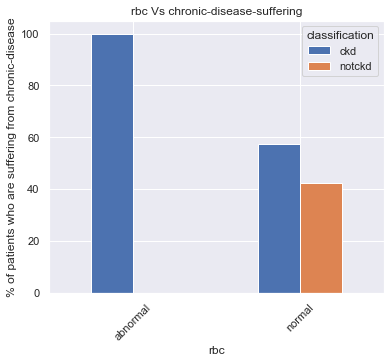

classification,ckd,notckd
rbc,,
abnormal,100.00,0.00
normal,57.51,42.49


In [42]:
bivariate_cat(kidney_data,'rbc','classification',45)

The graph shows patients having rbc as normal, have high chances of suffering from chronic kidney disease.

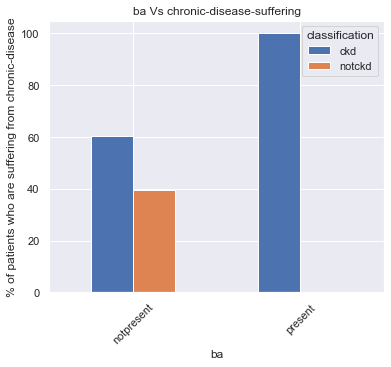

classification,ckd,notckd
ba,,
notpresent,60.32,39.68
present,100.00,0.00


In [43]:
bivariate_cat(kidney_data,"ba","classification",45)

Patients who have some amount of bacteria in their body , have higher chances of suffering from chronic disease.

#### Encoding Categorical Features

In [44]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['classification']

# Categorical cols
category_names = kidney_data.nunique()[kidney_data.nunique() < 20].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in kidney_data.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = kidney_data.nunique()[kidney_data.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    kidney_data[i] = le.fit_transform(kidney_data[i])
    
# Duplicating cols for multi-value columns
kidney_data = pd.get_dummies(data=kidney_data, columns=multi_cols)

In [45]:
kidney_data.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,48.0,1,1,0,0,121.0,36.0,1.2,115.0,4.5,15.4,44.0,7800.0,5.2,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,7.0,1,1,0,0,93.0,18.0,0.8,139.0,3.9,11.3,38.0,6000.0,5.8,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,62.0,1,1,0,0,423.0,53.0,1.8,145.0,3.5,9.6,31.0,7500.0,3.2,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,48.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,51.0,1,1,0,0,106.0,26.0,1.4,139.0,3.9,11.6,35.0,7300.0,4.6,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Normalizing features

In [46]:
cont_features = []
for features in kidney_data.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [47]:
kd_df = kidney_data
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
kd_df[cont_features] = minmax.fit_transform(kd_df[cont_features].values)

In [48]:
kd_df.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1.0,1.0,0.0,0.0,0.211538,0.088575,0.010582,0.697161,0.044944,0.836735,0.777778,0.231405,0.525424,1.0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1.0,1.0,0.0,0.0,0.151709,0.042362,0.005291,0.848580,0.031461,0.557823,0.644444,0.157025,0.627119,0.0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1.0,1.0,0.0,0.0,0.856838,0.132221,0.018519,0.886435,0.022472,0.442177,0.488889,0.219008,0.186441,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1.0,0.0,1.0,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1.0,1.0,0.0,0.0,0.179487,0.062901,0.013228,0.848580,0.031461,0.578231,0.577778,0.210744,0.423729,0.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Model Building

In [49]:
cols = [i for i in kd_df.columns if i not in tgt_col]
X = kd_df[cols]
Y = pd.DataFrame(kd_df['classification'])

X.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1.0,1.0,0.0,0.0,0.211538,0.088575,0.010582,0.697161,0.044944,0.836735,0.777778,0.231405,0.525424,1.0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1.0,1.0,0.0,0.0,0.151709,0.042362,0.005291,0.848580,0.031461,0.557823,0.644444,0.157025,0.627119,0.0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1.0,1.0,0.0,0.0,0.856838,0.132221,0.018519,0.886435,0.022472,0.442177,0.488889,0.219008,0.186441,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1.0,0.0,1.0,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1.0,1.0,0.0,0.0,0.179487,0.062901,0.013228,0.848580,0.031461,0.578231,0.577778,0.210744,0.423729,0.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Using K-Fold Cross validation

In [50]:
from sklearn.model_selection import KFold

In [51]:
# Create K-Folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

#### SVM Algorithm

SVM kernels(linear,gaussian, polynomial) are used. Tuning the various parameters such as C, gamma and degree to find out the best performing model.

#### Running SVM with default parameter

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))

Accuracy Score : 
0.95


#### Confusion Matrix

In [54]:
confusion_matrix(Y_test, y_pred)

array([[42,  4],
       [ 0, 34]], dtype=int64)

#### Classification Report

In [55]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.91      0.95        46
        1.0       0.89      1.00      0.94        34

avg / total       0.96      0.95      0.95        80



#### Linear Kernel

In [56]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score :")
print(accuracy_score(Y_test, y_pred))

Accuracy Score :
0.95


#### Confusion Matrix

In [58]:
confusion_matrix(Y_test, y_pred)

array([[42,  4],
       [ 0, 34]], dtype=int64)

In [59]:
# Classification Report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.91      0.95        46
        1.0       0.89      1.00      0.94        34

avg / total       0.96      0.95      0.95        80



#### RBF Kernel

In [62]:
svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Accuracy Score
0.95


In [63]:
# Confusion Matrix

confusion_matrix(Y_test, y_pred)

array([[42,  4],
       [ 0, 34]], dtype=int64)

In [64]:
# Classification Report

print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.91      0.95        46
        1.0       0.89      1.00      0.94        34

avg / total       0.96      0.95      0.95        80



#### Hyper-parameter Tuning

Determining hyper-parameter "C"

The "C" parameter tells the SVM optimization how much we want to avoid misclassifying the training data. For larger values of C, the optimization will choose a smaller-margin hyperplane if the hyperplane does a better job of getting all training points classified correctly. Also, a small value of C will cause the optimizer to look at a larger-margin seperating hyperplane, even if that hyperplane misclassifies more points.

Large values of C causes "overfitting" of model and small values of "C" causes "underfitting" of model. Thus, the value of C needs to be generalized.

In [65]:
from sklearn.model_selection import cross_val_score

C_range = list(np.arange(0.1,2,0.1))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc, X, Y,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9674559533161261, 0.9724684846444469, 0.9724684846444469, 0.9699622189802865, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9699809224553922, 0.9699809224553922, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469, 0.9724684846444469]


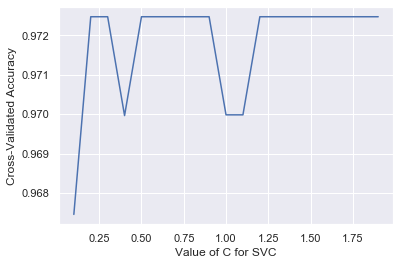

In [66]:
# Plotting graph
import matplotlib.pyplot as plt
%matplotlib inline

C_range = list(np.arange(0.1,2,0.1))
# plot the value of C for SVM
plt.plot(C_range, acc_score)
#plt.xticks(np.arange(0.0001,0.1,0.1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Considering 'rbf' as kernel and taking different values of "gamma"

Gamma parameter is the inverse of standard deviation of the RBF Kernel, which is used as similarity measure between two points. A small gamma value define a Gaussian function with a large variance. Here, two points can be considered similar even if they are far from each other. On the other hand, a large gamma value defines a Gaussian function with a small variance.

In [67]:
gamma_range = [0.0001, 0.001, 0.01, 0.1]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.625, 0.625, 0.9574999999999999, 0.9724999999999999]


Text(0, 0.5, 'Cross validated accuracy')

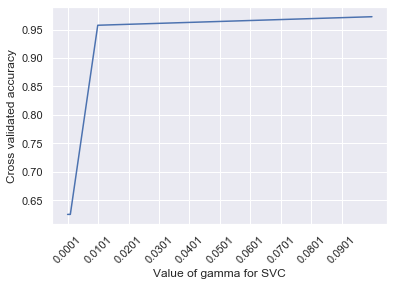

In [68]:
# Plot the gamma for SVM (x-axis) versus the cross-validated accuracy(y-axis)
plt.plot(gamma_range, acc_score)
plt.xlabel('Value of gamma for SVC')
plt.xticks(np.arange(0.0001, 0.1, 0.01), rotation=45)
plt.ylabel('Cross validated accuracy')

#### The score increases steadily and reaches its peak at 0.01 and then, decreases till gamma=1. Thus, Gamma should be around 0.01.